<a href="https://colab.research.google.com/github/azam-tents/Heart_disease_ARO_SCSO/blob/master/heart_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [ ]:
df=pd.read_csv("/content/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df["target"].value_counts()

,count
target,
1,526
0,499


In [ ]:
df['oldpeak'].max()

6.2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Feature and target split
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (Linear)": SVC(kernel="linear"),
    "SVM (RBF)": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate
results = {}
for name, model in classifiers.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Optional: print sorted summary
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance Summary:")
for name, acc in sorted_results:
    print(f"{name}: {acc:.4f}")


Logistic Regression Accuracy: 0.7951
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


K-Nearest Neighbors Accuracy: 0.8341
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205


SVM (Linear) Accuracy: 0.8146
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro avg       0.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select a few top-performing models to include in the ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svr', SVC(kernel="linear", probability=True, random_state=42)), # Added probability=True and random_state
        ('rf', RandomForestClassifier(random_state=42))
    ],
    voting='soft'  # or 'hard'
)

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_voting = voting_clf.predict(X_test_scaled)
voting_acc = accuracy_score(y_test, y_pred_voting)

print(f"\nVoting Classifier Accuracy: {voting_acc:.4f}")
print(classification_report(y_test, y_pred_voting))

# Add to results (assuming results dictionary is still in scope from previous cells)
if 'results' in globals():
    results["Voting Classifier"] = voting_acc
else:
    print("\n'results' dictionary not found. Cannot add Voting Classifier accuracy.")


Voting Classifier Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       102
           1       0.96      0.95      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.utils import shuffle

# # Step 1: Shuffle the dataset
# df_shuffled = shuffle(df, random_state=42).reset_index(drop=True)

# # Step 2: Split the dataset into 5 equal-sized groups
# batch_size = len(df_shuffled) // 5
# batches = [df_shuffled.iloc[i * batch_size:(i + 1) * batch_size] for i in range(5)]

# # Ensure all data is included (if rows aren't divisible by 5)
# if len(df_shuffled) % 5 != 0:
#     batches[-1] = pd.concat([batches[-1], df_shuffled.iloc[5 * batch_size:]], ignore_index=True)

# # Step 3: Define classifiers
# models = {
#      'SVM': SVC(kernel="linear", probability=True, random_state=42), # Added a comma here

#     "Random Forest": RandomForestClassifier(random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42)
# }

# # Step 4: Train and evaluate on each batch
# results = []

# for i, batch in enumerate(batches):
#     X = batch.drop("target", axis=1)
#     y = batch["target"]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Standardize
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     for model_name, model in models.items():
#         model.fit(X_train_scaled, y_train)
#         y_pred = model.predict(X_test_scaled)
#         acc = accuracy_score(y_test, y_pred)

#         results.append({
#             "Batch": f"Batch {i+1}",
#             "Model": model_name,
#             "Accuracy": acc
#         })

# # Step 5: Convert results to DataFrame and rank them
# results_df = pd.DataFrame(results)
# ranked = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# print("\n🔍 Ranked Accuracy by Batch and Model:\n")
# print(ranked)

In [ ]:
# print("Batch 3 Data (first 5 rows):")
# display(batches[2].head())

# print("\nBatch 4 Data (first 5 rows):")
# display(batches[3].head())

# print("\nBatch 5 Data (first 5 rows):")
# display(batches[4].head())


In [ ]:
# # For Batch 3
# print("Correlation matrix for Batch 3:")
# print(batches[2].corr())

# print("\nCorrelation matrix for Batch 4:")
# print(batches[3].corr())

# print("\nCorrelation matrix for Batch 5:")
# print(batches[4].corr())


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# for i, batch_num in zip([2, 3, 4], [3, 4, 5]):
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(batches[i].corr(), annot=True, cmap='coolwarm', fmt=".2f")
#     plt.title(f'Correlation Matrix - Batch {batch_num}')
#     plt.show()


In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# # Prepare data
# X = df.drop("target", axis=1)
# y = df["target"]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize models with fixed random_state for reproducibility
# dt = DecisionTreeClassifier(random_state=42)
# rf = RandomForestClassifier(random_state=42)
# gb = GradientBoostingClassifier(random_state=42)

# voting_clf_weighted = VotingClassifier(
#     estimators=[('dt', dt), ('rf', rf), ('gb', gb)],
#     voting='soft',
#     weights=[1, 3, 1]  # Give RF 3x weight
# )
# voting_clf_weighted.fit(X_train_scaled, y_train)
# y_pred_w = voting_clf_weighted.predict(X_test_scaled)
# print(f"Weighted Ensemble Accuracy: {accuracy_score(y_test, y_pred_w):.4f}")

# # Train ensemble
# voting_clf.fit(X_train_scaled, y_train)

# # Predict and evaluate
# y_pred = voting_clf.predict(X_test_scaled)
# acc = accuracy_score(y_test, y_pred)

# print(f"Ensemble Voting Classifier Accuracy: {acc:.4f}")
# print(classification_report(y_test, y_pred))


Weighted Ensemble Accuracy: 0.9854
Ensemble Voting Classifier Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       102
           1       0.96      0.95      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import numpy as np





X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(rf_classifier)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)


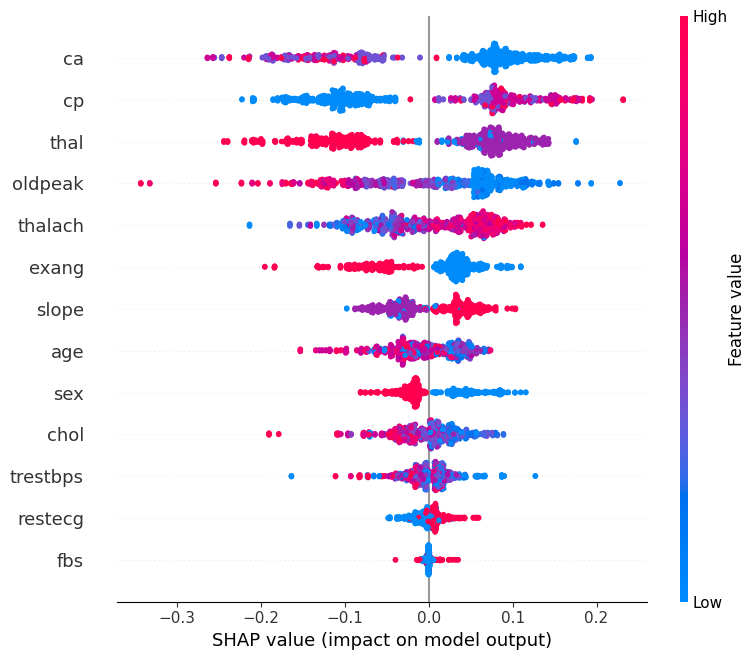

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_train.values, feature_names=X.columns)

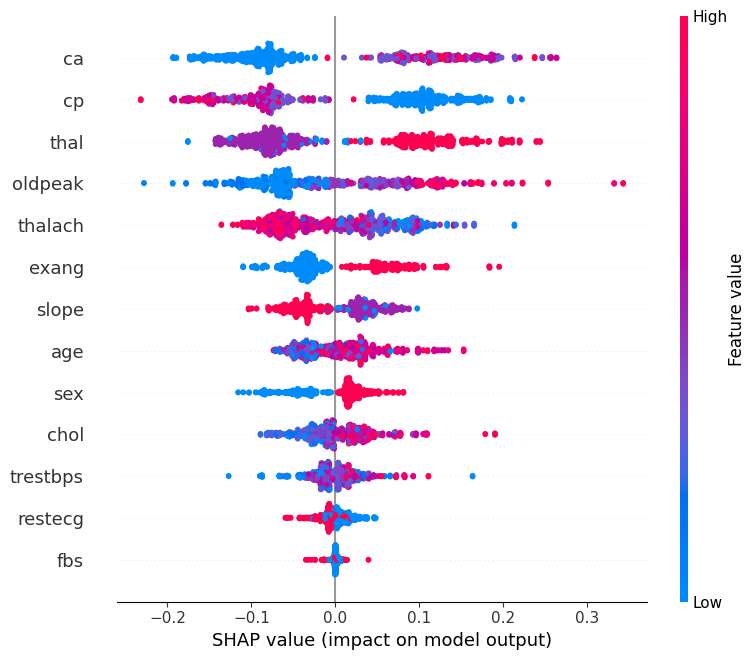

In [ ]:
shap.summary_plot(shap_values[:,:,0], X_train.values, feature_names=X.columns)

In [ ]:
# # Select the SHAP values for the positive class
# shap_values_positive = shap_values[:,:,1]

# # Create a SHAP Explanation object for the positive class
# explanation_positive = shap.Explanation(shap_values_positive,
#                                         feature_names=X_train.columns,
#                                         data=X_train.values)

# # Plot the SHAP values for the positive class
# shap.plots.bar(explanation_positive)

In [ ]:
# # prompt: select shap value for negative class and bar plot

# # Select the SHAP values for the negative class
# shap_values_negative = shap_values[:,:,0]

# # Create a SHAP Explanation object for the negative class
# explanation_negative = shap.Explanation(shap_values_negative,
#                                         feature_names=X_train.columns,
#                                         data=X_train.values)

# # Plot the SHAP values for the negative class
# shap.plots.bar(explanation_negative)



Selected Features from SelectKBest (Top 3): ['cp', 'thalach', 'oldpeak']

--- SelectKBest Top 3 ---
Accuracy: 0.9707
Confusion Matrix:
 [[ 96   6]
 [  0 103]]


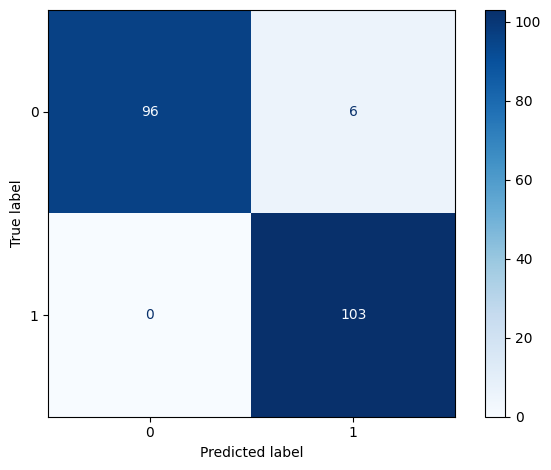

AUC: 0.9966


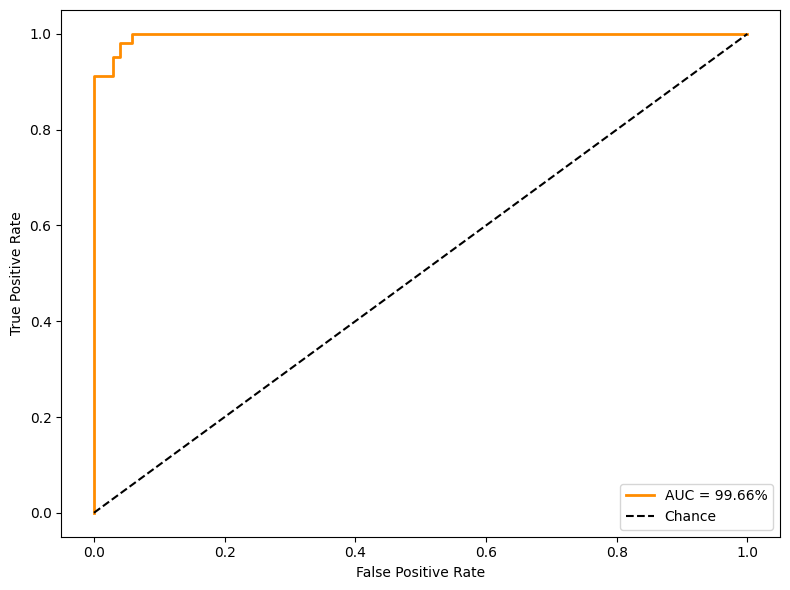


Selected Features from SelectKBest (Top 5): ['cp', 'thalach', 'exang', 'oldpeak', 'ca']

--- SelectKBest Top 5 ---
Accuracy: 0.9805
Confusion Matrix:
 [[101   1]
 [  3 100]]


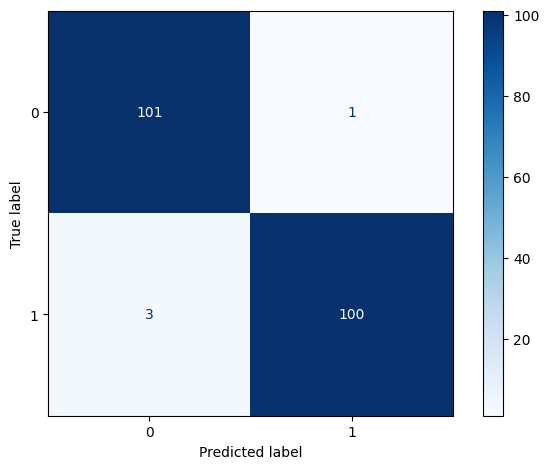

AUC: 0.9773


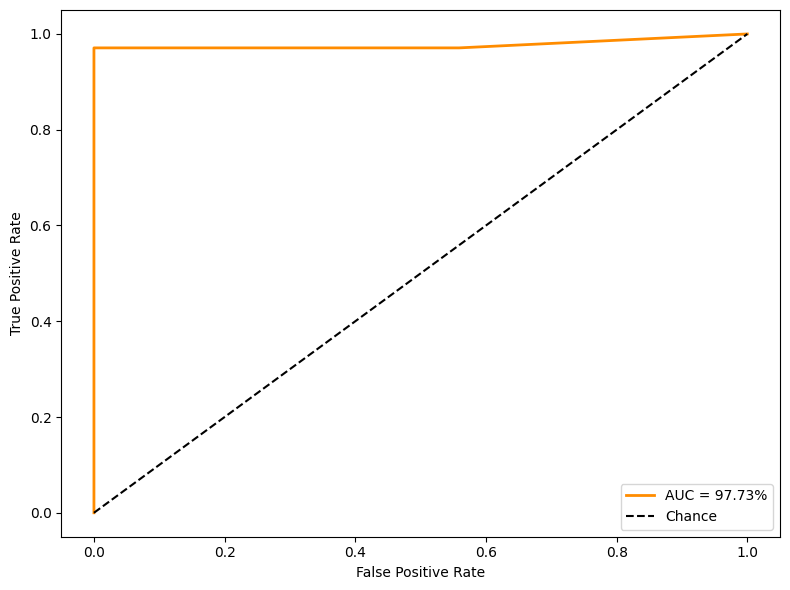


Selected Features from SelectKBest (Top 7): ['age', 'cp', 'chol', 'thalach', 'exang', 'oldpeak', 'ca']

--- SelectKBest Top 7 ---
Accuracy: 0.9854
Confusion Matrix:
 [[102   0]
 [  3 100]]


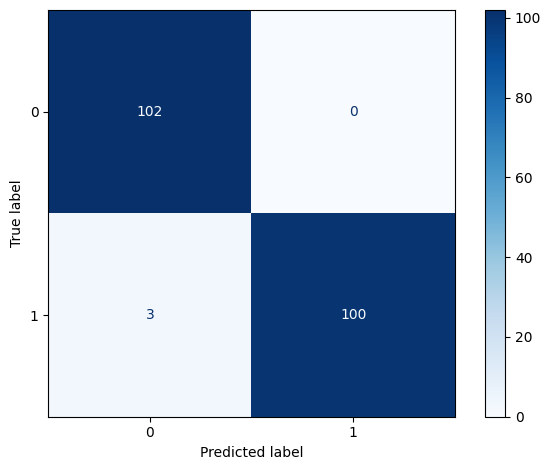

AUC: 0.9943


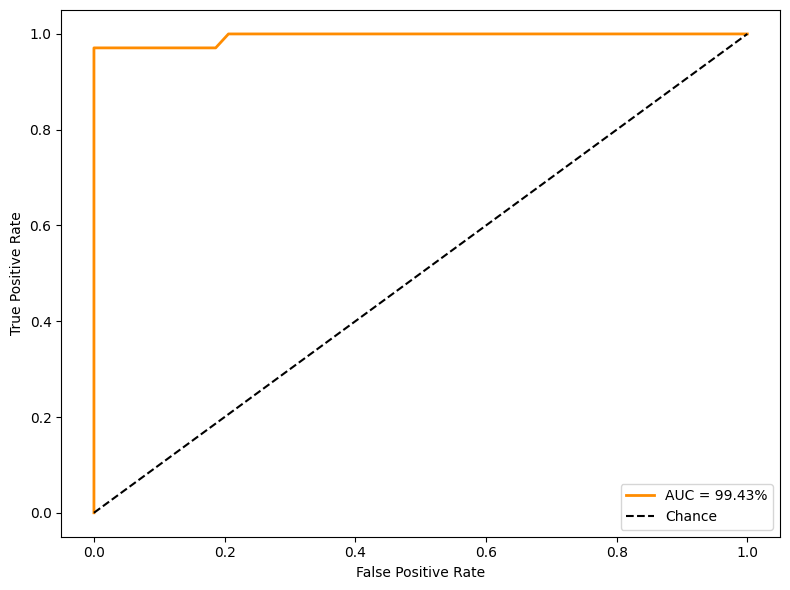

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# --- Step 1: Feature and target split ---
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Helper function to evaluate and plot ---
def evaluate_rf(X_train_sub, X_test_sub, y_train, y_test, label):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_sub)
    X_test_scaled = scaler.transform(X_test_sub)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n--- {label} ---")
    print(f"Accuracy: {acc:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    # plt.title(f"Confusion Matrix - {label}")
    plt.tight_layout()
    plt.savefig(f"cm_{label.replace(' ', '_').lower()}.png", dpi=300)
    plt.show()

    # ROC & AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc * 100:.2f}%", color="darkorange", linewidth=2)
    plt.plot([0, 1], [0, 1], "k--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title(f"ROC Curve - {label}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig(f"roc_{label.replace(' ', '_').lower()}.png", dpi=300)
    plt.show()


# --- Step 2: SelectKBest for k = 3, 5, 7 ---
for k in [3, 5, 7]:
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X, y)
    selected_features = X.columns[selector.get_support()].tolist()
    print(f"\nSelected Features from SelectKBest (Top {k}):", selected_features)

    evaluate_rf(
        X_train[selected_features],
        X_test[selected_features],
        y_train,
        y_test,
        label=f"SelectKBest Top {k}"
    )
